In [1]:
import pandas as pd

# Clean data

### Read files

In [2]:
%ls

Data analytics notebook - first linear regression.ipynb
Data analytics notebook - logistic regression.ipynb
wifi_logs_occupancy_survey_merged_df.csv


In [3]:
wifi_log_data = pd.read_csv("../cleaned_data/full.csv", names=["room", "event_time", "detec1", "detec2"])
wifi_log_data.head()

,room,event_time,detec1,detec2
0,Belfield > Computer Science > B-002,Mon Nov 02 20:32:06 GMT+00:00 2015,0,0
1,Belfield > Computer Science > B-002,Mon Nov 02 20:37:10 GMT+00:00 2015,0,0
2,Belfield > Computer Science > B-002,Mon Nov 02 20:42:12 GMT+00:00 2015,0,0
3,Belfield > Computer Science > B-002,Mon Nov 02 20:47:14 GMT+00:00 2015,0,0
4,Belfield > Computer Science > B-002,Mon Nov 02 20:52:11 GMT+00:00 2015,0,0


In [4]:
wifi_log_data.tail()

,room,event_time,detec1,detec2
12412,Belfield > Computer Science > B-004,Tue Nov 17 11:01:59 GMT+00:00 2015,18,18
12413,Belfield > Computer Science > B-004,Tue Nov 17 11:06:37 GMT+00:00 2015,32,32
12414,Belfield > Computer Science > B-004,Tue Nov 17 11:13:19 GMT+00:00 2015,39,39
12415,Belfield > Computer Science > B-004,Tue Nov 17 11:21:11 GMT+00:00 2015,42,42
12416,Belfield > Computer Science > B-004,Tue Nov 17 11:26:07 GMT+00:00 2015,46,46


### Transform timestamps

In [5]:
import time
from dateutil.parser import parse

for i in range(wifi_log_data.shape[0]):
    x = wifi_log_data["event_time"][i]
    y = parse(x)
    epoch = int(time.mktime(y.timetuple()))
    wifi_log_data.set_value(i,"event_time",epoch)

In [6]:
wifi_log_data.head()

,room,event_time,detec1,detec2
0,Belfield > Computer Science > B-002,1446496326,0,0
1,Belfield > Computer Science > B-002,1446496630,0,0
2,Belfield > Computer Science > B-002,1446496932,0,0
3,Belfield > Computer Science > B-002,1446497234,0,0
4,Belfield > Computer Science > B-002,1446497531,0,0


### Extract room data

In [7]:
for i in range(wifi_log_data.shape[0]):
    #the following line selects the last character of the string, which is the room ID
    wifi_log_data.set_value(i, "room", wifi_log_data["room"][i][-1:])

In [8]:
wifi_log_data.head()

,room,event_time,detec1,detec2
0,2,1446496326,0,0
1,2,1446496630,0,0
2,2,1446496932,0,0
3,2,1446497234,0,0
4,2,1446497531,0,0


In [9]:
wifi_log_data.tail()

,room,event_time,detec1,detec2
12412,4,1447758119,18,18
12413,4,1447758397,32,32
12414,4,1447758799,39,39
12415,4,1447759271,42,42
12416,4,1447759567,46,46


### Add building

In [10]:
wifi_log_data["building"] = "school of computer science"

In [11]:
wifi_log_data.head()

,room,event_time,detec1,detec2,building
0,2,1446496326,0,0,school of computer science
1,2,1446496630,0,0,school of computer science
2,2,1446496932,0,0,school of computer science
3,2,1446497234,0,0,school of computer science
4,2,1446497531,0,0,school of computer science


In [12]:
occupancy_data = pd.read_csv("../cleaned_data/survey_data.csv")

In [13]:
occupancy_data.head()

,Unnamed: 0,room,event_time,occupancy,building
0,0,4,1446454800,0.25,school of computer science
1,1,2,1446454800,0.25,school of computer science
2,2,3,1446454800,0.25,school of computer science
3,3,4,1446458400,0.50,school of computer science
4,4,2,1446458400,0.50,school of computer science


In [14]:
occupancy_data.tail()

,Unnamed: 0,room,event_time,occupancy,building
235,235,2,1447426800,0.25,school of computer science
236,236,3,1447426800,0.25,school of computer science
237,237,4,1447430400,0.00,school of computer science
238,238,2,1447430400,0.25,school of computer science
239,239,3,1447430400,0.25,school of computer science


### Deleted unwated column

In [15]:
del occupancy_data["Unnamed: 0"]

In [16]:
occupancy_data.head()

,room,event_time,occupancy,building
0,4,1446454800,0.25,school of computer science
1,2,1446454800,0.25,school of computer science
2,3,1446454800,0.25,school of computer science
3,4,1446458400,0.50,school of computer science
4,2,1446458400,0.50,school of computer science


# Prepare data for analysis

### Transform EPOCH time into human-friendly time

In [17]:
occupancy_data['event_time'] = pd.to_datetime(occupancy_data.event_time, unit='s')
occupancy_data.head()

,room,event_time,occupancy,building
0,4,2015-11-02 09:00:00,0.25,school of computer science
1,2,2015-11-02 09:00:00,0.25,school of computer science
2,3,2015-11-02 09:00:00,0.25,school of computer science
3,4,2015-11-02 10:00:00,0.50,school of computer science
4,2,2015-11-02 10:00:00,0.50,school of computer science


In [18]:
wifi_log_data['event_time'] = pd.to_datetime(wifi_log_data.event_time, unit='s')
wifi_log_data.set_index('event_time', inplace=True)
wifi_log_data.head()

,room,detec1,detec2,building
event_time,,,,
2015-11-02 20:32:06,2,0,0,school of computer science
2015-11-02 20:37:10,2,0,0,school of computer science
2015-11-02 20:42:12,2,0,0,school of computer science
2015-11-02 20:47:14,2,0,0,school of computer science
2015-11-02 20:52:11,2,0,0,school of computer science


In [19]:
wifi_log_data['event_hour'] = wifi_log_data.index.hour
wifi_log_data['event_day'] = wifi_log_data.index.day

wifi_log_data.index.name = None

wifi_log_data.head()

,room,detec1,detec2,building,event_hour,event_day
2015-11-02 20:32:06,2,0,0,school of computer science,20,2
2015-11-02 20:37:10,2,0,0,school of computer science,20,2
2015-11-02 20:42:12,2,0,0,school of computer science,20,2
2015-11-02 20:47:14,2,0,0,school of computer science,20,2
2015-11-02 20:52:11,2,0,0,school of computer science,20,2


In [20]:
occupancy_data['event_time'] = pd.to_datetime(occupancy_data.event_time, unit='s')
occupancy_data.set_index('event_time', inplace=True)
occupancy_data.head()

,room,occupancy,building
event_time,,,
2015-11-02 09:00:00,4,0.25,school of computer science
2015-11-02 09:00:00,2,0.25,school of computer science
2015-11-02 09:00:00,3,0.25,school of computer science
2015-11-02 10:00:00,4,0.50,school of computer science
2015-11-02 10:00:00,2,0.50,school of computer science


In [21]:
occupancy_data['event_hour'] = occupancy_data.index.hour
occupancy_data['event_day'] = occupancy_data.index.day

occupancy_data.index.name = None

occupancy_data.head()

,room,occupancy,building,event_hour,event_day
2015-11-02 09:00:00,4,0.25,school of computer science,9,2
2015-11-02 09:00:00,2,0.25,school of computer science,9,2
2015-11-02 09:00:00,3,0.25,school of computer science,9,2
2015-11-02 10:00:00,4,0.50,school of computer science,10,2
2015-11-02 10:00:00,2,0.50,school of computer science,10,2


### Compute average number of wifi connections per room, day and hour

##### This is to make it easy to compare it with the survey data where we only have 1 recorded value per room, day and hour

In [22]:
df_mean_conn = wifi_log_data.groupby(['room', 'event_day', 'event_hour'], as_index=False).mean()

In [23]:
df_mean_conn.head()

,room,event_day,event_hour,detec1,detec2
0,2,2,20,0.0,0.0
1,2,2,21,0.0,0.0
2,2,2,22,0.0,0.0
3,2,2,23,0.0,0.0
4,2,3,0,0.0,0.0


### Merge the data into a single data frame

In [24]:
df_mean_conn['room'] = df_mean_conn['room'].astype(int)

print(df_mean_conn.dtypes)

room            int64
event_day       int64
event_hour      int64
detec1        float64
detec2        float64
dtype: object


In [25]:
occupancy_data.dtypes

room            int64
occupancy     float64
building       object
event_hour      int32
event_day       int32
dtype: object

In [26]:
df = pd.merge(df_mean_conn, occupancy_data, on=['room', 'event_day', 'event_hour'], how='inner')

df.head(15)

,room,event_day,event_hour,detec1,detec2,occupancy,building
0,2,3,9,4.750000,4.666667,0.00,school of computer science
1,2,3,10,29.272727,29.181818,0.50,school of computer science
2,2,3,11,28.727273,28.636364,0.50,school of computer science
3,2,3,12,14.166667,14.166667,0.50,school of computer science
4,2,3,13,14.250000,14.166667,0.00,school of computer science
5,2,3,14,46.363636,46.181818,0.75,school of computer science
6,2,3,15,40.272727,39.727273,0.25,school of computer science
7,2,3,16,36.416667,35.916667,0.25,school of computer science
8,2,4,9,13.454545,13.363636,0.25,school of computer science
9,2,4,10,14.416667,14.333333,0.25,school of computer science


### add estimated occupancy

##### (number of occupants: number of seats in the room * occupancy % as indicated on the occupancy survey)

In [27]:
max_occupancy_b002_b003 = 90
max_occupancy_b004 = 220

In [28]:
df['estim_nb_ocpnts'] = None

for i in range(df.shape[0]):
    if df['room'][i] == 2 or df['room'][i] == 3 :
        estim = df['occupancy'][i] * max_occupancy_b002_b003
        df.set_value(i,'estim_nb_ocpnts', estim)
    elif df['room'][i] == 4:
        estim = df['occupancy'][i] * max_occupancy_b004
        df.set_value(i,'estim_nb_ocpnts', estim)
    else:
        raise ValueError("Incorrect room number:", df['room'][i])

In [29]:
df.head(15)

,room,event_day,event_hour,detec1,detec2,occupancy,building,estim_nb_ocpnts
0,2,3,9,4.750000,4.666667,0.00,school of computer science,0
1,2,3,10,29.272727,29.181818,0.50,school of computer science,45
2,2,3,11,28.727273,28.636364,0.50,school of computer science,45
3,2,3,12,14.166667,14.166667,0.50,school of computer science,45
4,2,3,13,14.250000,14.166667,0.00,school of computer science,0
5,2,3,14,46.363636,46.181818,0.75,school of computer science,67.5
6,2,3,15,40.272727,39.727273,0.25,school of computer science,22.5
7,2,3,16,36.416667,35.916667,0.25,school of computer science,22.5
8,2,4,9,13.454545,13.363636,0.25,school of computer science,22.5
9,2,4,10,14.416667,14.333333,0.25,school of computer science,22.5


In [30]:
df.tail(15)

,room,event_day,event_hour,detec1,detec2,occupancy,building,estim_nb_ocpnts
201,4,12,10,29.916667,29.750000,0.50,school of computer science,110
202,4,12,11,49.416667,49.166667,0.25,school of computer science,55
203,4,12,12,51.545455,51.363636,0.25,school of computer science,55
204,4,12,13,73.750000,73.583333,0.50,school of computer science,110
205,4,12,14,46.000000,46.000000,0.50,school of computer science,110
206,4,12,15,1.166667,1.166667,0.25,school of computer science,55
207,4,12,16,51.166667,51.083333,0.00,school of computer science,0
208,4,13,9,6.583333,6.416667,0.00,school of computer science,0
209,4,13,10,54.272727,54.000000,0.00,school of computer science,0
210,4,13,11,32.818182,32.727273,0.00,school of computer science,0


### save to csv

In [31]:
df.to_csv('wifi_logs_occupancy_survey_merged_df.csv')

# Data analytics

### Add dummies

In [32]:
dummies = pd.get_dummies(df['occupancy']).rename(columns=lambda x: 'Category_' + str(x).replace(".", ""))
df = pd.concat([df, dummies], axis=1)

df.head()

,room,event_day,event_hour,detec1,detec2,occupancy,building,estim_nb_ocpnts,Category_00,Category_025,Category_05,Category_075,Category_10
0,2,3,9,4.750000,4.666667,0.0,school of computer science,0,1.0,0.0,0.0,0.0,0.0
1,2,3,10,29.272727,29.181818,0.5,school of computer science,45,0.0,0.0,1.0,0.0,0.0
2,2,3,11,28.727273,28.636364,0.5,school of computer science,45,0.0,0.0,1.0,0.0,0.0
3,2,3,12,14.166667,14.166667,0.5,school of computer science,45,0.0,0.0,1.0,0.0,0.0
4,2,3,13,14.250000,14.166667,0.0,school of computer science,0,1.0,0.0,0.0,0.0,0.0


In [33]:
df[['detec2', 
            'Category_00', 
            'Category_025', 
            'Category_05', 
            'Category_075',
            'Category_10']].corr()

,detec2,Category_00,Category_025,Category_05,Category_075,Category_10
detec2,1.000000,-0.458783,0.038297,0.272914,0.259409,0.408865
Category_00,-0.458783,1.000000,-0.599776,-0.319682,-0.162637,-0.045733
Category_025,0.038297,-0.599776,1.000000,-0.426401,-0.216930,-0.060999
Category_05,0.272914,-0.319682,-0.426401,1.000000,-0.115624,-0.032513
Category_075,0.259409,-0.162637,-0.216930,-0.115624,1.000000,-0.016541
Category_10,0.408865,-0.045733,-0.060999,-0.032513,-0.016541,1.000000


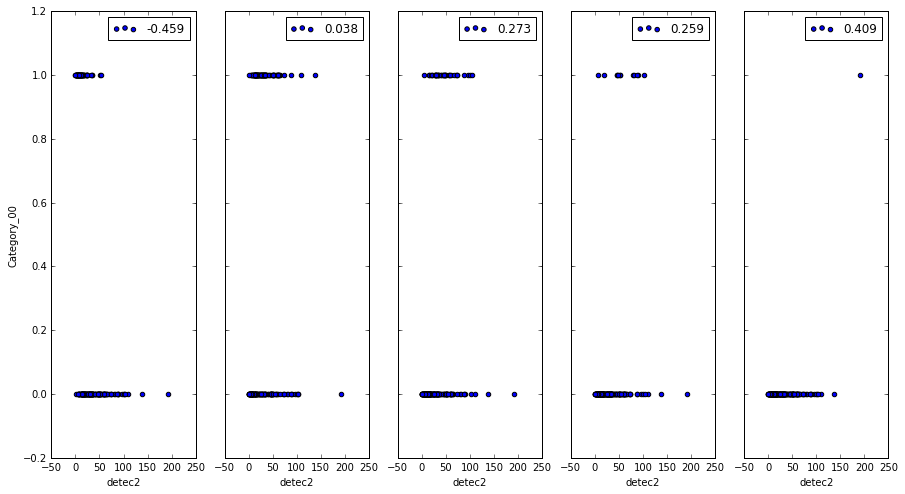

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(1, 5, sharey=True)

df.plot(kind='scatter', x='detec2', y='Category_00', label="%.3f" 
        % df[['detec2', 'Category_00']].corr().as_matrix()[0,1], ax=axs[0], figsize=(15, 8))

df.plot(kind='scatter', x='detec2', y='Category_025', label="%.3f" 
        % df[['detec2', 'Category_025']].corr().as_matrix()[0,1], ax=axs[1])

df.plot(kind='scatter', x='detec2', y='Category_05', label="%.3f" 
        % df[['detec2', 'Category_05']].corr().as_matrix()[0,1], ax=axs[2])

df.plot(kind='scatter', x='detec2', y='Category_075', label="%.3f" 
        % df[['detec2', 'Category_075']].corr().as_matrix()[0,1], ax=axs[3])

df.plot(kind='scatter', x='detec2', y='Category_10', label="%.3f"
        % df[['detec2', 'Category_10']].corr().as_matrix()[0,1], ax=axs[4])

In [36]:
from patsy import dmatrices
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

In [52]:
def calculate_logreg_details(df, feature, dummy):
    '''provides details of the calculation of the logistic regression between 1 feature and 1 target.
    This function does not return.
    
    Parameters
    ----------
        df: a pandas dataframe
        feature: predictive feature
        dummy: target feature (binary)
    
    Returns
    ---------
        void
    '''
    intercept = pd.DataFrame({'Intercept': np.ones(df.shape[0])})
    X = pd.concat([intercept, df[[feature, dummy]]], axis=1)
    y = df[dummy]
    print("Descriptive features:\n", X)
    print()
    print("\nTarget feature:\n", y)
    print()
    logreg = LogisticRegression().fit(X[['Intercept', feature]], y)
    print("Coeficients: \n", logreg.coef_)
    print()
    logreg.predict_proba(X[['Intercept', feature]])
    predictions = logreg.predict(X[['Intercept', feature]])
    print("Predictions: ", predictions)
    print()
    print("Accuracy:", logreg.score(X[['Intercept', feature]], y))

    
def calculate_logreg(df, feature, dummy):
    '''provide the logistic regression accuracy between a feature and a target.
    
    Parameters
    ----------
        df: a pandas dataframe
        feature: predictive feature
        dummy: target feature (binary)
    
    Returns
    ---------
        float: accuracy of the logistic regression
    '''
    
    intercept = pd.DataFrame({'Intercept': np.ones(df.shape[0])})
    X = pd.concat([intercept, df[[feature, dummy]]], axis=1)
    y = df[dummy]
    logreg = LogisticRegression().fit(X[['Intercept', feature]], y)
    logreg.predict_proba(X[['Intercept', feature]])
    predictions = logreg.predict(X[['Intercept', feature]])
    return logreg.score(X[['Intercept', feature]], y)

In [53]:
calculate_logreg_details(df, 'detec2', 'Category_00')

Descriptive features:
      Intercept      detec2  Category_00
0          1.0    4.666667          1.0
1          1.0   29.181818          0.0
2          1.0   28.636364          0.0
3          1.0   14.166667          0.0
4          1.0   14.166667          1.0
5          1.0   46.181818          0.0
6          1.0   39.727273          0.0
7          1.0   35.916667          0.0
8          1.0   13.363636          0.0
9          1.0   14.333333          0.0
10         1.0    8.272727          0.0
11         1.0   33.000000          0.0
12         1.0   25.083333          1.0
13         1.0   23.000000          0.0
14         1.0    5.545455          1.0
15         1.0   16.909091          0.0
16         1.0    6.666667          1.0
17         1.0   33.636364          0.0
18         1.0   32.400000          0.0
19         1.0   20.750000          0.0
20         1.0   13.583333          0.0
21         1.0   31.818182          0.0
22         1.0   49.166667          0.0
23         1.0   

In [55]:
print("Accuracy: predicting occupancy 0%:", calculate_logreg(df, 'detec2', 'Category_00'))
print("Accuracy: predicting occupancy 25%:", calculate_logreg(df, 'detec2', 'Category_025'))
print("Accuracy: predicting occupancy 50%:", calculate_logreg(df, 'detec2', 'Category_05'))
print("Accuracy: predicting occupancy 75%:", calculate_logreg(df, 'detec2', 'Category_075'))
print("Accuracy: predicting occupancy 100%:", calculate_logreg(df, 'detec2', 'Category_10'))

Accuracy: predicting occupancy 0%: 0.828703703704
Accuracy: predicting occupancy 25%: 0.555555555556
Accuracy: predicting occupancy 50%: 0.805555555556
Accuracy: predicting occupancy 75%: 0.939814814815
Accuracy: predicting occupancy 100%: 0.99537037037


In [57]:
calculate_logreg_details(df, 'detec2', 'Category_025')

Descriptive features:
      Intercept      detec2  Category_025
0          1.0    4.666667           0.0
1          1.0   29.181818           0.0
2          1.0   28.636364           0.0
3          1.0   14.166667           0.0
4          1.0   14.166667           0.0
5          1.0   46.181818           0.0
6          1.0   39.727273           1.0
7          1.0   35.916667           1.0
8          1.0   13.363636           1.0
9          1.0   14.333333           1.0
10         1.0    8.272727           1.0
11         1.0   33.000000           0.0
12         1.0   25.083333           0.0
13         1.0   23.000000           1.0
14         1.0    5.545455           0.0
15         1.0   16.909091           1.0
16         1.0    6.666667           0.0
17         1.0   33.636364           0.0
18         1.0   32.400000           1.0
19         1.0   20.750000           1.0
20         1.0   13.583333           1.0
21         1.0   31.818182           1.0
22         1.0   49.166667        

In [58]:
calculate_logreg_details(df, 'detec2', 'Category_10')

Descriptive features:
      Intercept      detec2  Category_10
0          1.0    4.666667          0.0
1          1.0   29.181818          0.0
2          1.0   28.636364          0.0
3          1.0   14.166667          0.0
4          1.0   14.166667          0.0
5          1.0   46.181818          0.0
6          1.0   39.727273          0.0
7          1.0   35.916667          0.0
8          1.0   13.363636          0.0
9          1.0   14.333333          0.0
10         1.0    8.272727          0.0
11         1.0   33.000000          0.0
12         1.0   25.083333          0.0
13         1.0   23.000000          0.0
14         1.0    5.545455          0.0
15         1.0   16.909091          0.0
16         1.0    6.666667          0.0
17         1.0   33.636364          0.0
18         1.0   32.400000          0.0
19         1.0   20.750000          0.0
20         1.0   13.583333          0.0
21         1.0   31.818182          0.0
22         1.0   49.166667          0.0
23         1.0   

In [62]:
df.head(20)

,room,event_day,event_hour,detec1,detec2,occupancy,building,estim_nb_ocpnts,Category_00,Category_025,Category_05,Category_075,Category_10
0,2,3,9,4.750000,4.666667,0.00,school of computer science,0,1.0,0.0,0.0,0.0,0.0
1,2,3,10,29.272727,29.181818,0.50,school of computer science,45,0.0,0.0,1.0,0.0,0.0
2,2,3,11,28.727273,28.636364,0.50,school of computer science,45,0.0,0.0,1.0,0.0,0.0
3,2,3,12,14.166667,14.166667,0.50,school of computer science,45,0.0,0.0,1.0,0.0,0.0
4,2,3,13,14.250000,14.166667,0.00,school of computer science,0,1.0,0.0,0.0,0.0,0.0
5,2,3,14,46.363636,46.181818,0.75,school of computer science,67.5,0.0,0.0,0.0,1.0,0.0
6,2,3,15,40.272727,39.727273,0.25,school of computer science,22.5,0.0,1.0,0.0,0.0,0.0
7,2,3,16,36.416667,35.916667,0.25,school of computer science,22.5,0.0,1.0,0.0,0.0,0.0
8,2,4,9,13.454545,13.363636,0.25,school of computer science,22.5,0.0,1.0,0.0,0.0,0.0
9,2,4,10,14.416667,14.333333,0.25,school of computer science,22.5,0.0,1.0,0.0,0.0,0.0


In [61]:
df.tail(20)

,room,event_day,event_hour,detec1,detec2,occupancy,building,estim_nb_ocpnts,Category_00,Category_025,Category_05,Category_075,Category_10
196,4,11,13,7.400000,7.300000,0.00,school of computer science,0,1.0,0.0,0.0,0.0,0.0
197,4,11,14,12.166667,12.000000,0.00,school of computer science,0,1.0,0.0,0.0,0.0,0.0
198,4,11,15,35.250000,35.083333,0.00,school of computer science,0,1.0,0.0,0.0,0.0,0.0
199,4,11,16,5.666667,5.583333,0.00,school of computer science,0,1.0,0.0,0.0,0.0,0.0
200,4,12,9,73.454545,73.363636,0.50,school of computer science,110,0.0,0.0,1.0,0.0,0.0
201,4,12,10,29.916667,29.750000,0.50,school of computer science,110,0.0,0.0,1.0,0.0,0.0
202,4,12,11,49.416667,49.166667,0.25,school of computer science,55,0.0,1.0,0.0,0.0,0.0
203,4,12,12,51.545455,51.363636,0.25,school of computer science,55,0.0,1.0,0.0,0.0,0.0
204,4,12,13,73.750000,73.583333,0.50,school of computer science,110,0.0,0.0,1.0,0.0,0.0
205,4,12,14,46.000000,46.000000,0.50,school of computer science,110,0.0,0.0,1.0,0.0,0.0


In [67]:
df.occupancy.value_counts()

0.25    96
0.00    67
0.50    40
0.75    12
1.00     1
Name: occupancy, dtype: int64

In [68]:
df.loc[df['occupancy'] == 1.0]

,room,event_day,event_hour,detec1,detec2,occupancy,building,estim_nb_ocpnts,Category_00,Category_025,Category_05,Category_075,Category_10
160,4,5,9,192.916667,191.583333,1.0,school of computer science,220,0.0,0.0,0.0,0.0,1.0


In [70]:
help(pd)

Help on package pandas:

NAME
    pandas

DESCRIPTION
    pandas - a powerful data analysis and manipulation library for Python
    
    See http://pandas.pydata.org/ for full documentation. Otherwise, see the
    docstrings of the various objects in the pandas namespace:
    
    Series
    DataFrame
    Panel
    Index
    DatetimeIndex
    HDFStore
    bdate_range
    date_range
    read_csv
    read_fwf
    read_table
    ols

PACKAGE CONTENTS
    _period
    _sparse
    _testing
    _version
    algos
    compat (package)
    computation (package)
    core (package)
    formats (package)
    hashtable
    index
    indexes (package)
    info
    io (package)
    json
    lib
    msgpack (package)
    parser
    rpy (package)
    sandbox (package)
    sparse (package)
    stats (package)
    tests (package)
    tools (package)
    tseries (package)
    tslib
    types (package)
    util (package)

SUBMODULES
    datetools
    offsets

DATA
    IndexSlice = <pandas.core.indexing._In